1. Para-procesimi i te dhenave përgatitjen e të dhënave për analizë

In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

Mbledhja e të dhënave, definimi i tipeve të dhënave, kualiteti i të
dhënave.

In [2]:
#Ngarkimi i te dhenave
file_path ='C:/Users/HP/Desktop/VizualizimiITeDhenave/dataset.csv'
data=pd.read_csv(file_path)
data

,LoanID,ApplicantID,ApplicantGender,ApplicantMarried,ApplicantDependents,ApplicantEducation,ApplicantSelfEmployed,ApplicantIncome,ApplicantCreditHistory,ApplicantZIP,ApplicantState,ApplicantEmplLength,ApplicantHomeOwn,LoanAmount,LoanTerm,LoanIntRate,LoanDesc,LoanPurpose,LoanApproved
0,56026,19874,Moški,NE,0 oseb,Diplomiral,NE,1949.666667,1.0,33xx,Slovenija,5 let,STANOVANJSKI KREDIT,NaN,90.0,1.42%,NaN,prenova,Y
1,53884,34258,Moški,DA,1 oseba,Diplomiral,NE,1527.666667,1.0,64xx,Slovenija,10+ let,NAJEM,44800.0,90.0,3.90%,NaN,drugo,N
2,48350,66552,Moški,DA,0 oseb,Brez diplome,NE,861.000000,1.0,30xx,si,3 leta,NAJEM,42000.0,90.0,2.80%,NaN,NaN,Y
3,30455,54844,Moški,DA,2 osebi,Diplomiral,NE,1066.666667,1.0,84xx,SI,1 leto,NAJEM,24500.0,90.0,3.26%,NaN,NaN,Y
4,935,18820,Moški,DA,2 osebi,Diplomiral,NaN,833.333333,1.0,60xx,SI,10+ let,STANOVANJSKI KREDIT,38150.0,90.0,3.26%,NaN,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38762,19296,7212,NaN,DA,1 oseba,Diplomiral,NE,873.333333,1.0,14xx,SI,NaN,NAJEM,57750.0,90.0,2.89%,NaN,kartica,Y
38763,20271,32616,Moški,NE,0 oseb,Diplomiral,NE,3107.666667,1.0,63xx,Slo,3 leta,STANOVANJSKI KREDIT,17500.0,90.0,1.52%,Posojilojemalec je dodal na 02-06-14 > Samo o...,NaN,Y
38764,27733,46393,Ženska,DA,NaN,Diplomiral,DA,800.000000,0.0,42xx,SI,2 leti,LASTNO,58800.0,90.0,2.50%,NaN,NaN,N
38765,42707,20062,Moški,DA,3+ osebe,Diplomiral,NE,1365.000000,NaN,84xx,SI,3 leta,STANOVANJSKI KREDIT,43050.0,120.0,1.78%,NaN,NaN,Y


In [3]:
# Informacion rreth dataframe-it 
data_info = data.info()
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38767 entries, 0 to 38766
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LoanID                  38767 non-null  int64  
 1   ApplicantID             38767 non-null  int64  
 2   ApplicantGender         37902 non-null  object 
 3   ApplicantMarried        38573 non-null  object 
 4   ApplicantDependents     37775 non-null  object 
 5   ApplicantEducation      38767 non-null  object 
 6   ApplicantSelfEmployed   36702 non-null  object 
 7   ApplicantIncome         38767 non-null  float64
 8   ApplicantCreditHistory  35687 non-null  float64
 9   ApplicantZIP            38767 non-null  object 
 10  ApplicantState          38767 non-null  object 
 11  ApplicantEmplLength     36924 non-null  object 
 12  ApplicantHomeOwn        38767 non-null  object 
 13  LoanAmount              37370 non-null  float64
 14  LoanTerm                37863 non-null

In [4]:
#numri i rreshtave dhe kolonave ne dataframe
data.shape

(38767, 19)

In [5]:
#shfaq statistikat per çdo kolone ne DataFrame
print(data.describe().T)

                          count          mean           std     min      25%  \
LoanID                  38767.0  34552.451441  19888.051126     1.0  17433.5   
ApplicantID             38767.0  34544.994918  19990.383285     1.0  17141.5   
ApplicantIncome         38767.0   1801.602781   2013.534166    50.0    963.0   
ApplicantCreditHistory  35687.0      0.842099      0.364653     0.0      1.0   
LoanAmount              37370.0  51087.712069  29882.568304  3150.0  35000.0   
LoanTerm                37863.0     85.473576     16.198891     3.0     90.0   

                            50%           75%       max  
LoanID                  34460.0  51691.000000   69133.0  
ApplicantID             34480.0  51847.500000   69134.0  
ApplicantIncome          1271.0   1933.333333   27000.0  
ApplicantCreditHistory      1.0      1.000000       1.0  
LoanAmount              44800.0  58450.000000  245000.0  
LoanTerm                   90.0     90.000000     120.0  


In [6]:
print(data.describe(include="O").T)

                       count unique  \
ApplicantGender        37902      2   
ApplicantMarried       38573      2   
ApplicantDependents    37775      4   
ApplicantEducation     38767      2   
ApplicantSelfEmployed  36702      2   
ApplicantZIP           38767     44   
ApplicantState         38767      5   
ApplicantEmplLength    36924     11   
ApplicantHomeOwn       38767      3   
LoanIntRate            38767     65   
LoanDesc                1521   1119   
LoanPurpose            14845      9   
LoanApproved           38767      2   

                                                                     top  \
ApplicantGender                                                    Moški   
ApplicantMarried                                                      DA   
ApplicantDependents                                               0 oseb   
ApplicantEducation                                            Diplomiral   
ApplicantSelfEmployed                                                 NE 

In [7]:
# llogarit perqindjen e rreshtave te dyfishte ne DataFrame

duplicated=data.duplicated().sum()
print((duplicated/len(data))*100 , '%')

0.0 %


In [8]:
# Funksioni missing_values_table llogarit numrin dhe perqindjen e vlerave Null

def missing_values_table(data):
  mis_val = data.isnull().sum()
  mis_val_percent = 100*data.isnull().sum() / len(data)
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values' , 1:'% of Total Values'})
  return mis_val_table_ren_columns.round(1)

In [9]:
missing_values_table(data)

,Missing Values,% of Total Values
LoanID,0,0.0
ApplicantID,0,0.0
ApplicantGender,865,2.2
ApplicantMarried,194,0.5
ApplicantDependents,992,2.6
ApplicantEducation,0,0.0
ApplicantSelfEmployed,2065,5.3
ApplicantIncome,0,0.0
ApplicantCreditHistory,3080,7.9
ApplicantZIP,0,0.0


In [10]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data_sorted = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=True)

print("\nMissing values in the dataset:\n", missing_data_sorted)


Missing values in the dataset:
                         Missing Values  Percentage
ApplicantMarried                   194    0.500426
ApplicantGender                    865    2.231279
LoanTerm                           904    2.331880
ApplicantDependents                992    2.558877
LoanAmount                        1397    3.603580
ApplicantEmplLength               1843    4.754043
ApplicantSelfEmployed             2065    5.326695
ApplicantCreditHistory            3080    7.944902
LoanPurpose                      23922   61.707122
LoanDesc                         37246   96.076560


In [11]:
data['ApplicantDependents'].value_counts().reset_index().rename(columns={'index' : 'ApplicantDependents' , 'ApplicantDependents' : 'counts'})



,ApplicantDependents,counts
0,0 oseb,21803
1,1 oseba,6397
2,2 osebi,6329
3,3+ osebe,3246


In [12]:
data['ApplicantEmplLength'].value_counts().reset_index().rename(columns={'index' : 'ApplicantEmplLength' , 'ApplicantEmplLength' : 'counts'})

,ApplicantEmplLength,counts
0,10+ let,12695
1,2 leti,3451
2,3 leta,3093
3,< 1 leto,2988
4,1 leto,2526
5,7 let,2244
6,5 let,2203
7,4 leta,2140
8,6 let,2059
9,8 let,1898


In [13]:
data['ApplicantGender'].value_counts().reset_index().rename(columns={'index' : 'ApplicantGender' , 'ApplicantGender' : 'counts'})

,ApplicantGender,counts
0,Moški,30882
1,Ženska,7020


In [14]:
data['LoanAmount'].value_counts().reset_index().rename(columns={'index' : 'LoanAmount' , 'LoanAmount' : 'counts'})

,LoanAmount,counts
0,42000.0,1241
1,38500.0,1127
2,35000.0,920
3,65450.0,773
4,56000.0,757
...,...,...
198,12250.0,52
199,122150.0,51
200,93450.0,50
201,122500.0,49


In [15]:
data['ApplicantHomeOwn'].value_counts().reset_index().rename(columns={'index' : 'ApplicantHomeOwn' , 'ApplicantHomeOwn' : 'counts'})

,ApplicantHomeOwn,counts
0,STANOVANJSKI KREDIT,19667
1,NAJEM,15341
2,LASTNO,3759


In [16]:
data['ApplicantEducation'].value_counts().reset_index().rename(columns={'index' : 'ApplicantEducation' , 'ApplicantEducation' : 'counts'})

,ApplicantEducation,counts
0,Diplomiral,30132
1,Brez diplome,8635


In [17]:
data['ApplicantState'].value_counts().reset_index().rename(columns={'index' : 'ApplicantState' , 'ApplicantState' : 'counts'})

,ApplicantState,counts
0,SI,19357
1,Slovenija,9692
2,si,4750
3,Slo,2969
4,slo,1999


In [18]:
data['ApplicantZIP'].value_counts().reset_index().rename(columns={'index' : 'ApplicantZIP' , 'ApplicantZIP' : 'counts'})

,ApplicantZIP,counts
0,33xx,3259
1,11xx,3059
2,60xx,2818
3,30xx,2312
4,10xx,2278
5,32xx,1679
6,20xx,1601
7,80xx,1591
8,02xx,1416
9,21xx,1196


///

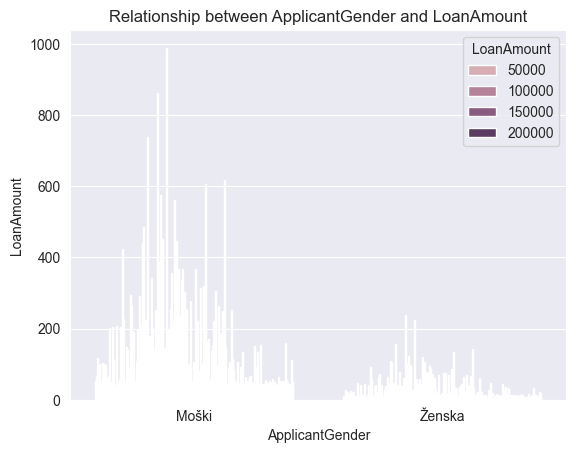

In [21]:
sns.set_palette(['#9932CC','#EEE685'])
sns.countplot(x='ApplicantGender', hue='LoanAmount', data=data)
plt.xlabel('ApplicantGender')
plt.ylabel('LoanAmount')
plt.title('Relationship between ApplicantGender and LoanAmount')

plt.show()